In [1]:
import sys
import os

# move two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [2]:
from modules.index.DocumentContext import DocumentContext

dc = DocumentContext.load_existing(
    persist_dir="deliverables/FMGlobal/index",
    verbose=False
)

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(dc)

DocumentContext with 217 chunks.
Graph has 4718 nodes and 8400 edges.


In [4]:
dc.dispatch

{'get_unique_identifiers': True,
 'get_citations': False,
 'get_insights': False,
 'add_vector_index': False,
 'persist': False}

In [5]:
vg = dc.as_vector_graph()

Adding citations:   0%|          | 0/217 [00:00<?, ?it/s]

Adding insights: 100%|██████████| 217/217 [12:03<00:00,  3.33s/it]


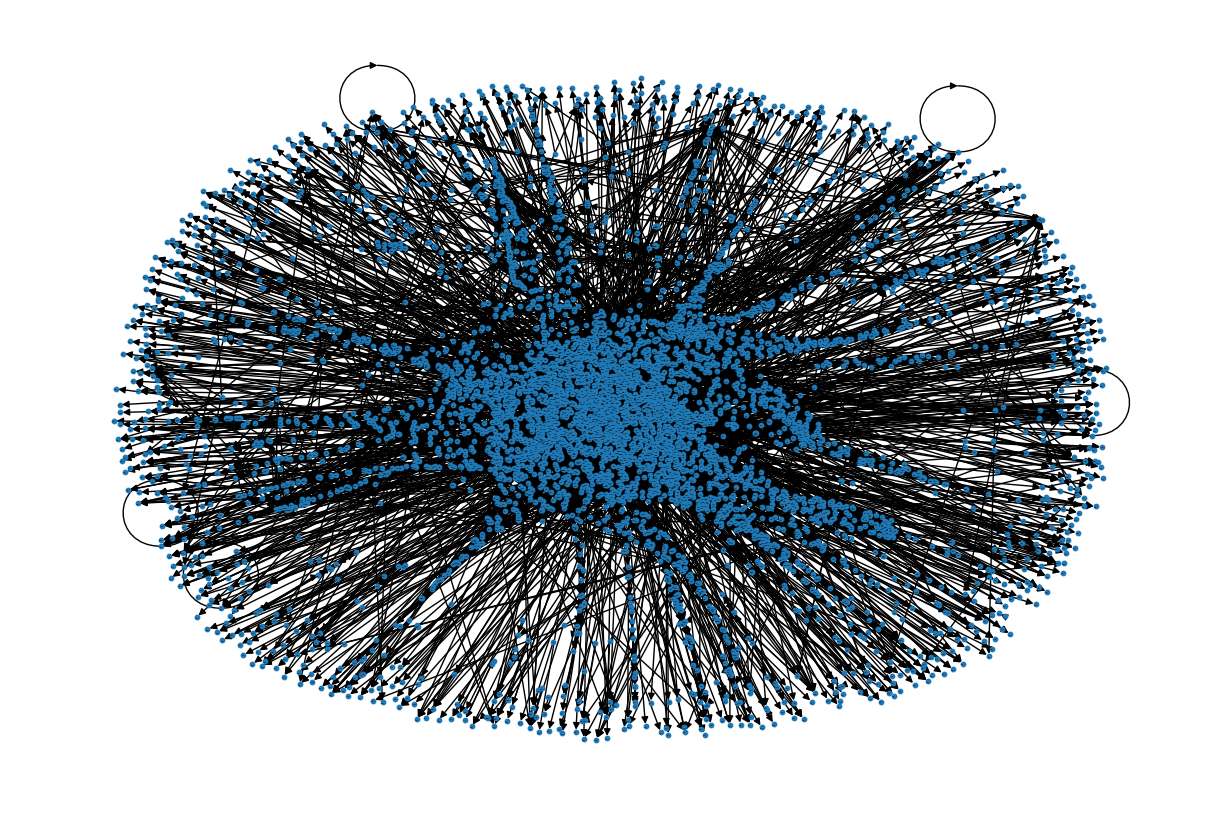

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(vg.graph, scale=2)
nx.draw(vg.graph, pos=pos, with_labels=True, node_size=10, font_size=1)
plt.show()

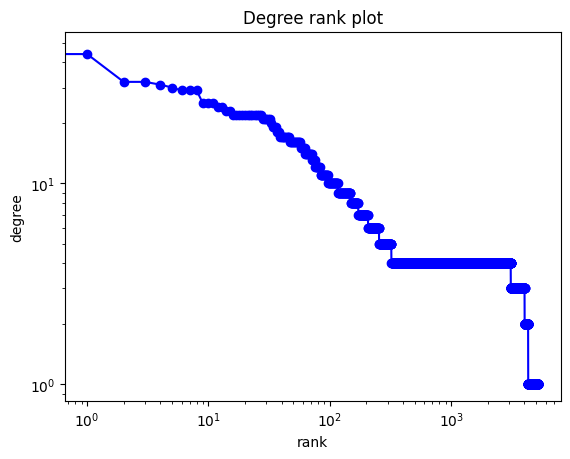

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = vg.graph

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
plt.axis('off')

plt.show()